In [1]:
# Import the necessary libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy import stats
import qda
import myfunc as mf


In [2]:
# Import the dataset
data = pd.read_csv('HB_phase1.csv')

# Inspect the dataset
print(data.info())
print('')
data.head()

#CHIEDITI SE CONVIENE RIMUOVERE UNA COLONNA(n>1, p=1)!!!
#data.drop(columns=['X2'], inplace=True)
#oppure:
#data2=data.copy()
#data2.drop(columns=['X2'], inplace=True) #lo tolgo solo dalla copia e l'altra originale me la lascio

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   x1      20 non-null     float64
 1   x2      20 non-null     float64
 2   x3      20 non-null     float64
 3   x4      20 non-null     float64
dtypes: float64(4)
memory usage: 768.0 bytes
None



,x1,x2,x3,x4
0,108.0,93.0,85.0,97.0
1,101.0,68.0,99.0,94.0
2,94.0,79.0,105.0,92.0
3,103.0,80.0,97.0,97.0
4,105.0,82.0,98.0,88.0


In [3]:
n=4

In [4]:
ARL0=500
alpha=1/ARL0
k=stats.norm.ppf(1-alpha/2)

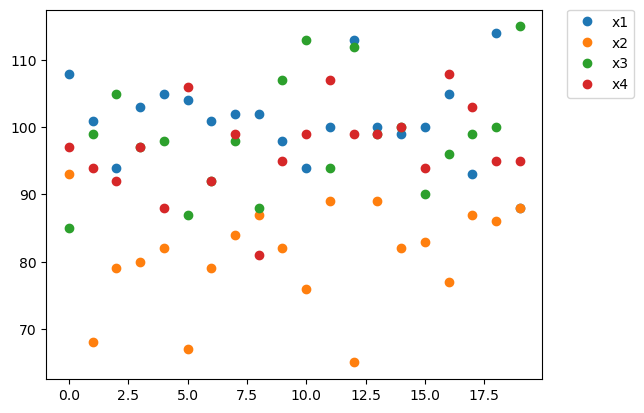

In [5]:
mf.dotplot(data)

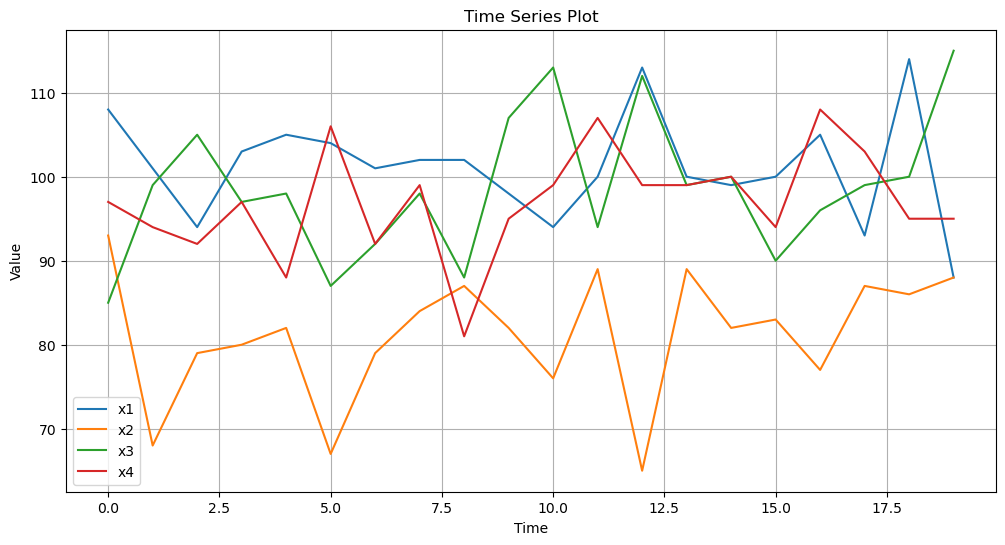

In [6]:
mf.multiple_ts_plot(data)

p-value of the Shapiro-Wilk test: 0.07211
Accept H0: the data are normal


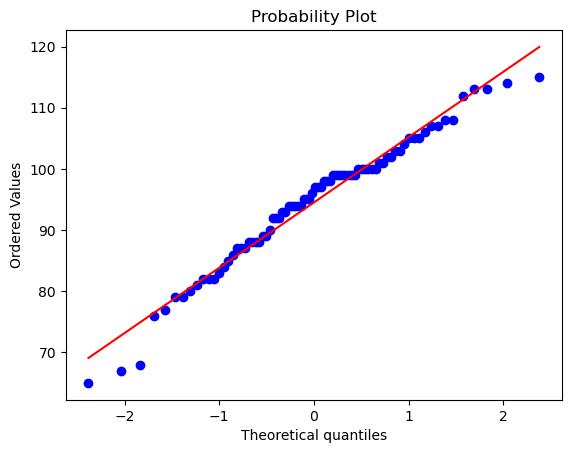

In [7]:
mf.shapiroqq(data,0.05,multiobservation='yes') 

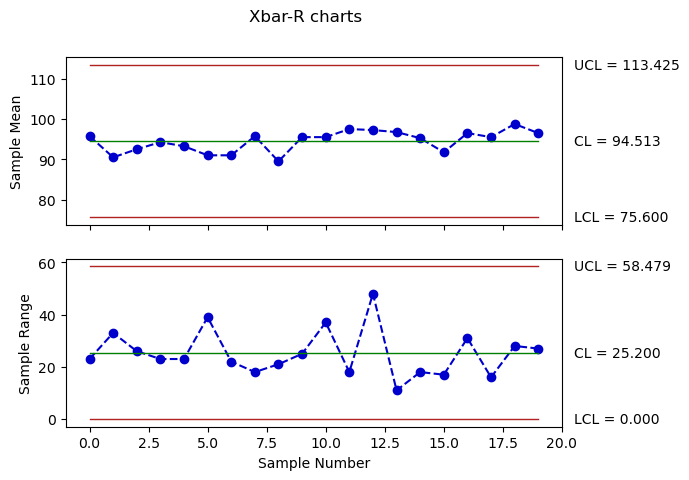

In [8]:
data_XR_qcc = qda.ControlCharts.XbarR(data,  K = k) 

In [9]:
CL = 0.95       # Confidence level
alpha = 1 - CL  # Significance level
F0 = data['x1'].var()/data['x2'].var() # F statistic
df1 = len(data) - 1 # degrees of freedom for supplier 
df2 = len(data)- 1 # degrees of freedom for supplier 2
#attenzione ai df che sono invertiti nell'IDC!!!!!!!
CI = [F0 * stats.f.ppf(alpha/2, df2, df1), F0 * stats.f.ppf(1-alpha/2, df2, df1)]
print('Confidence interval on the ratio of variances (CL = %.3f): [%.3f, %.3f]' % (CL, CI[0], CI[1]))

p_value_left = 2 * stats.f.cdf(F0, df1, df2)
p_value_F0= 2* min(p_value_left, 1 - p_value_left)
print(p_value_F0)

Confidence interval on the ratio of variances (CL = 0.950): [0.271, 1.727]
0.829672138173137


In [10]:
CL = 0.95       # Confidence level
alpha = 1 - CL  # Significance level
F0 = data['x1'].var()/data['x3'].var() # F statistic
df1 = len(data) - 1 # degrees of freedom for supplier 
df2 = len(data)- 1 # degrees of freedom for supplier 2
#attenzione ai df che sono invertiti nell'IDC!!!!!!!
CI = [F0 * stats.f.ppf(alpha/2, df2, df1), F0 * stats.f.ppf(1-alpha/2, df2, df1)]
print('Confidence interval on the ratio of variances (CL = %.3f): [%.3f, %.3f]' % (CL, CI[0], CI[1]))

p_value_left = 2 * stats.f.cdf(F0, df1, df2)
p_value_F0= 2* min(p_value_left, 1 - p_value_left)
print(p_value_F0)

Confidence interval on the ratio of variances (CL = 0.950): [0.221, 1.411]
0.42672024223816496


In [11]:
CL = 0.95       # Confidence level
alpha = 1 - CL  # Significance level
F0 = data['x1'].var()/data['x4'].var() # F statistic
df1 = len(data) - 1 # degrees of freedom for supplier 
df2 = len(data)- 1 # degrees of freedom for supplier 2
#attenzione ai df che sono invertiti nell'IDC!!!!!!!
CI = [F0 * stats.f.ppf(alpha/2, df2, df1), F0 * stats.f.ppf(1-alpha/2, df2, df1)]
print('Confidence interval on the ratio of variances (CL = %.3f): [%.3f, %.3f]' % (CL, CI[0], CI[1]))

p_value_left = 2 * stats.f.cdf(F0, df1, df2)
p_value_F0= 2* min(p_value_left, 1 - p_value_left)
print(p_value_F0)

Confidence interval on the ratio of variances (CL = 0.950): [0.383, 2.446]
0.11081556468406761


p-value of the Shapiro-Wilk test: 0.37421
Accept H0: the data are normal
p-value of the Shapiro-Wilk test: 0.46170


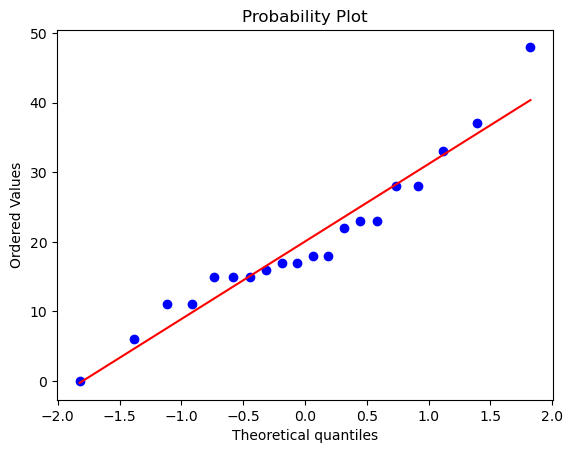

Accept H0: the data are normal
p-value of the Shapiro-Wilk test: 0.68860


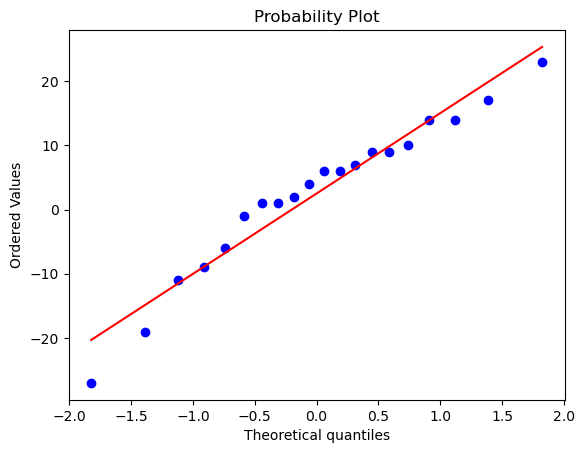

Accept H0: the data are normal


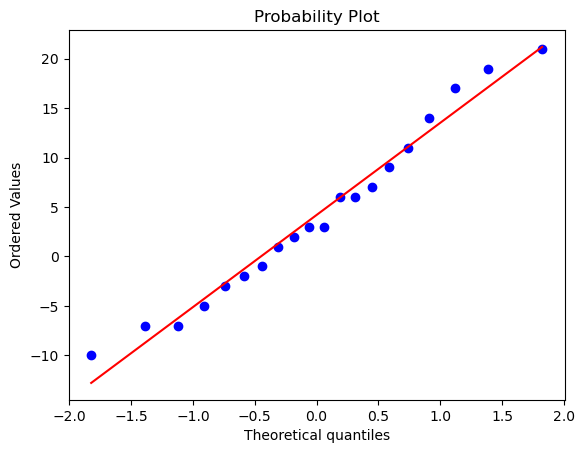

In [12]:
diff12=data['x1']-data['x2']
diff13=data['x1']-data['x3']
diff14=data['x1']-data['x4']

mf.shapiroqq(diff12)

mf.shapiroqq(diff13)

mf.shapiroqq(diff14)

In [13]:
t0_stats_trel, p_value_t0_stats_trel = stats.ttest_rel(data['x1'], data['x2'], alternative='two-sided') #in questo caso praticamente d0=0 per forza!
print('t-statistic from stats.ttest_rel: %.3f' % t0_stats_trel)
print('p-value from stats.ttest_rel: %.3f' % p_value_t0_stats_trel)


t-statistic from stats.ttest_rel: 8.209
p-value from stats.ttest_rel: 0.000


In [14]:
t0_stats_trel, p_value_t0_stats_trel = stats.ttest_rel(data['x1'], data['x3'], alternative='two-sided') #in questo caso praticamente d0=0 per forza!
print('t-statistic from stats.ttest_rel: %.3f' % t0_stats_trel)
print('p-value from stats.ttest_rel: %.3f' % p_value_t0_stats_trel)

t-statistic from stats.ttest_rel: 0.918
p-value from stats.ttest_rel: 0.370


In [15]:
t0_stats_trel, p_value_t0_stats_trel = stats.ttest_rel(data['x1'], data['x4'], alternative='two-sided') #in questo caso praticamente d0=0 per forza!
print('t-statistic from stats.ttest_rel: %.3f' % t0_stats_trel)
print('p-value from stats.ttest_rel: %.3f' % p_value_t0_stats_trel)

t-statistic from stats.ttest_rel: 2.102
p-value from stats.ttest_rel: 0.049


In [16]:
data_stack=mf.vettorializza(data)

   value
0  108.0
1   93.0
2   85.0
3   97.0
4  101.0


In [17]:
data_stack['mold']=np.tile(np.arange(1, 5), int(len(data_stack)/4)) 

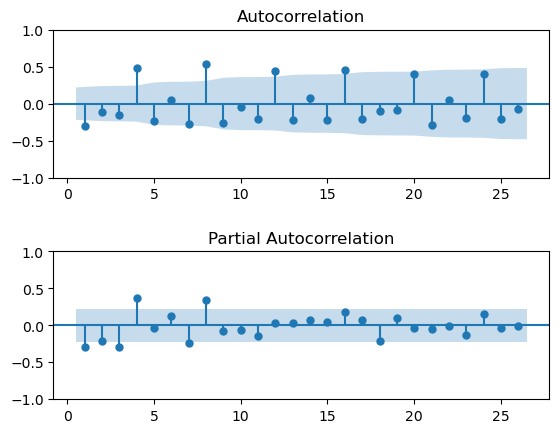

In [18]:
mf.acfpacf(data_stack['value'])

Number of points n = 80
Mean = 94.51


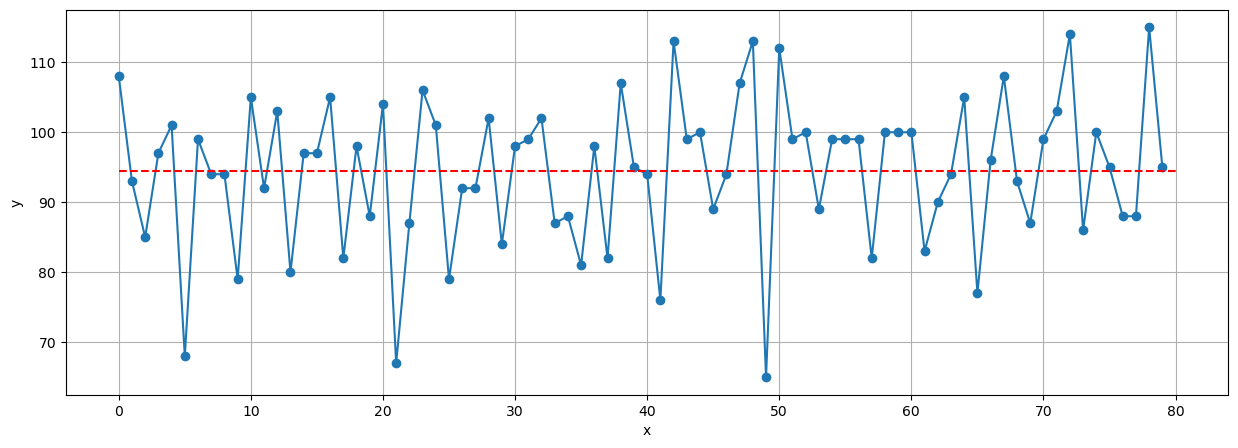

In [19]:
mf.single_ts_plot(data_stack['value'])

In [20]:
mf.runs(data_stack['value'])

Runs test statistic = 1.000
Runs test p-value = 0.31717
Accept H0: the data are random


In [21]:
mf.bartlett_test(data_stack['value'],4,0.05)

Standardized Test statistic rk*sqrt(n) = 4.299555
Rejection region of the standard normal starts at 1.959964
p-value = 0.000017
The null hypothesis is rejected


In [22]:
data_stack['dummy2']= np.where(data_stack['mold']==2, 1, 0)

In [23]:
import statsmodels.api as sm
x = data_stack['dummy2'] #se solo un regressore togli le doppie quadre e metti singole
x = sm.add_constant(x) 
y = data_stack['value']
model = sm.OLS(y, x).fit()
qda.summary(model)


REGRESSION EQUATION
-------------------
value =  + 98.967 const -17.817 dummy2

COEFFICIENTS
------------
  Term     Coef  SE Coef  T-Value    P-Value
 const  98.9667    0.944 104.8380 1.0653e-85
dummy2 -17.8167    1.888  -9.4368 1.5373e-14

MODEL SUMMARY
-------------
     S   R-sq  R-sq(adj)
7.3122 0.5331     0.5271

ANALYSIS OF VARIANCE
---------------------
    Source   DF      Adj SS      Adj MS    F-Value    P-Value
Regression  1.0   4761.5042   4761.5042    89.0538 1.5373e-14
     const  1.0 587664.0667 587664.0667 10991.0036 1.0653e-85
    dummy2  1.0   4761.5042   4761.5042    89.0538 1.5373e-14
     Error 78.0   4170.4833     53.4677        NaN        NaN
     Total 79.0   8931.9875         NaN        NaN        NaN


Shapiro-Wilk test p-value on the residuals = 0.41193


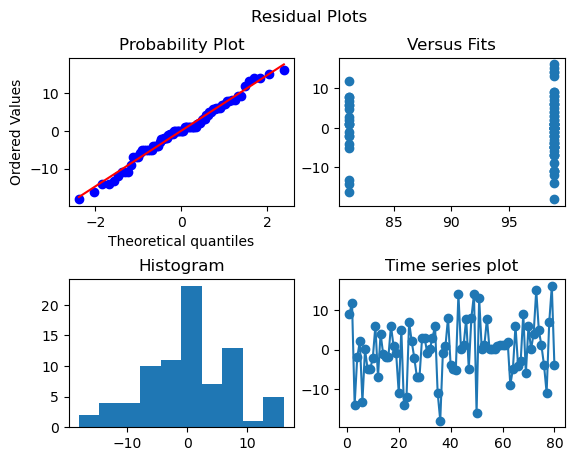

In [24]:
mf.shapirplusresplots(model)

In [25]:
mf.runs(model.resid)

Runs test statistic = -0.944
Runs test p-value = 0.34509
Accept H0: the data are random


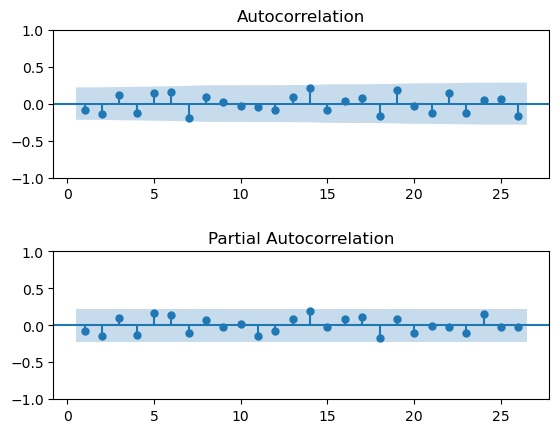

In [26]:
mf.acfpacf(model.resid)

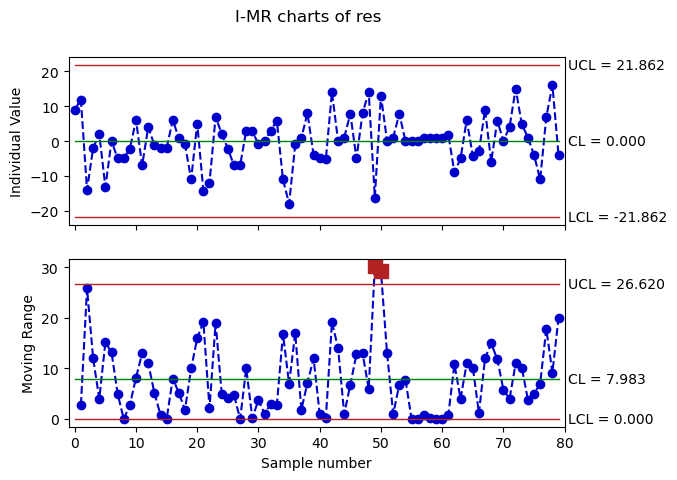

In [27]:
df_SCC = pd.DataFrame({'res': model.resid}) #lo chiamo direttamente df_SCC
df_SCC = qda.ControlCharts.IMR(df_SCC, 'res',K=k)


In [28]:
df_SCC_copy=df_SCC.copy()
df_SCC_copy['MR']=df_SCC['MR']+1e-3

p-value of the Shapiro-Wilk test: 0.00002
Reject H0: the data are not normal


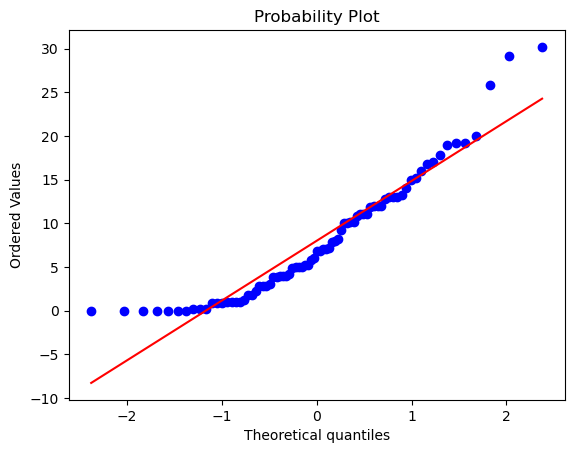

In [30]:
mf.shapiroqq(df_SCC_copy['MR'])

Lambda = 0.381
p-value of the Shapiro-Wilk test: 0.009

ricorda che ad eg. LCL di questo individual chart sugli MR trasformati dei residui che chiamo y(individuals), è trovato come ybar-3*(MRbar_y/d2(2)), dove MRbar_y è MR medio calcolato sugli y


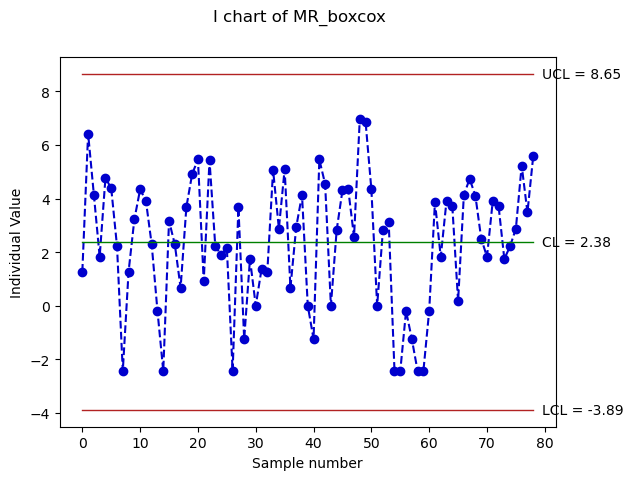

In [29]:
df_MR_boxcox=mf.IonMRresBoxCox(df_SCC_copy,use04='no',alpha=1/500,subset__size='False') 